In [20]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data
from scipy.stats import norm

%matplotlib inline

In [32]:
# # import data
# def get_data(stocks, start, end):
#     stockData = data.DataReader(stocks,'yahoo', start, end)
#     stockData = stockData['Close']
#     returns = stockData.pct_change()
#     meanReturns = returns.mean()
#     covMatrix = create_covar(stockData)
#     return meanReturns, covMatrix

# stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
# endDate = dt.datetime.now()
# startDate = endDate - dt.timedelta(days=300)

# meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

In [60]:
def get_data(stocks, start, end):
    stockData = data.DataReader(stocks,'yahoo', start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

weights = [0.3,0.1,0.1,0.2,0.2,0.1]

In [57]:
# def get_data(stocks, start_end, date_end):

tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA']

start_date = '2015-01-01'
end_date = '2022-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)
panel_data = panel_data['Close']
returns = panel_data.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()

weights = [0.2,0.1,0.3,0.5]

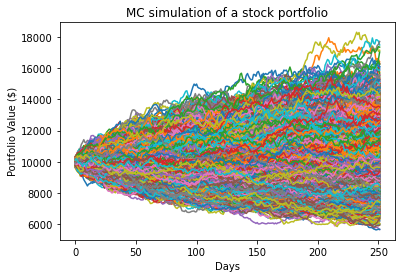

In [119]:
# Monte Carlo Method
mc_sims = 10000 # number of simulations
T = 252 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [120]:
df = pd.DataFrame(portfolio_sims)

In [121]:
df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,10051.522670,9967.099386,10168.271848,10112.930813,10098.087025,10016.480263,10087.754691,9997.741263,9996.343050,10070.345151,...,10129.150051,10060.420363,9891.577891,9994.908630,9963.864669,10006.222672,9895.432390,9918.512696,10127.948255,10110.178803
1,10121.202505,10036.904055,10241.554238,9952.821236,10140.114587,10093.089773,10207.046028,9908.812307,9878.061841,10150.814620,...,10161.981660,10014.061635,10022.956379,9828.644499,10064.260328,10064.793824,9833.381134,10055.553906,10140.386480,10191.776597
2,10207.918121,10054.661732,10347.893247,10000.999267,10083.948075,10079.973786,10239.394030,9862.480008,9913.835364,10260.970688,...,10078.964967,10095.513910,10385.766488,9804.770967,10183.353953,10128.270072,9863.244807,10068.348071,10380.912896,10050.852040
3,10202.045370,10051.992221,10285.688322,10023.595845,9925.973523,9841.489557,10269.913957,10044.478801,9988.801354,10215.899856,...,10206.919767,10072.013631,10450.418236,9726.913490,10139.381463,9977.968519,9921.574385,10247.673099,10315.393375,9918.559817
4,10194.381759,10025.058370,10241.467228,10078.565555,9824.563454,10115.969462,10334.653251,9824.907810,9845.408896,10376.477544,...,10324.469610,10155.093280,10544.203671,9811.818112,10116.821464,10057.566192,9736.124070,10105.243449,10391.841616,9957.333280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,10851.682196,10841.831135,10829.528230,8977.090794,10294.285848,11491.409048,13273.828280,9403.171867,12827.364470,13711.060000,...,9870.459146,12429.481141,11262.171037,12642.223074,10150.185809,7657.166228,10169.705399,8251.514903,9630.364626,8616.271139
248,10692.548154,10817.254203,10990.019740,9110.001775,10459.373882,11392.056956,13302.491207,9399.689182,12823.459887,13592.736813,...,9962.156545,12305.550537,11251.192253,12757.253038,10042.168644,7601.101904,10155.855218,8300.299631,9646.109802,8592.101729
249,10626.200159,10766.963901,11105.666489,9009.981026,10505.957130,11313.669349,13245.521246,9366.185017,12906.046967,13461.970082,...,9887.891844,12477.800760,11341.279013,12591.005974,10142.053312,7644.763981,10166.146550,8260.807769,9689.279290,8647.445379
250,10535.268594,10843.290319,11028.561297,8924.015853,10465.586135,11251.261594,13216.519096,9365.628815,12974.841106,13630.767574,...,9985.722308,12526.426707,11392.129461,12658.806456,10124.138346,7778.539524,10146.151217,8354.531732,9638.902578,8583.371188


In [122]:
percentagelist = []

for i in range(0,10000):
    initial = df[i].iloc[0]
    end = df[i].iloc[251]
    change = ((end-initial)/initial)*100
    percentagelist.append(change)

In [127]:
percentagelist

[4.071556550994501,
 9.68830369812741,
 6.506280329365834,
 -11.11021536649646,
 3.006699708970093,
 10.978501385605838,
 32.11486864723748,
 -5.332835596184124,
 29.53390089882445,
 33.65039420500517,
 -6.419378340872123,
 38.6663451036275,
 1.3784800896160092,
 -19.446989578365017,
 -9.920704311854788,
 12.11644274728127,
 0.34550465700423644,
 -13.55280906100094,
 -8.705192759383825,
 3.0176469571191658,
 15.844178292316624,
 3.3383593107970726,
 -7.71636863718303,
 5.400015889978045,
 -5.52109865519218,
 32.86176143700276,
 14.19643145939682,
 -19.600035025094954,
 -2.5270136092477435,
 -7.795468188790096,
 -4.126673197461994,
 18.862026410292106,
 18.046133070459256,
 -6.549985596425816,
 -16.01143822824406,
 4.63585140069887,
 -25.973475997379264,
 31.719340864795733,
 -0.7011879993833211,
 -9.220257218827756,
 -28.296185661996432,
 -1.3779860070738106,
 10.56165411579145,
 -22.723616778488786,
 -3.7866866210308334,
 15.456095531000692,
 5.853663622564053,
 21.919269723224225,
 3

In [128]:
max(percentagelist)

78.09582281287524

In [129]:
min(percentagelist)

-44.45325121739358

In [130]:

total = 0
for n in percentagelist:
    total += n
    
avg = total/10000

avg

1.637201686702133

In [90]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
251,10894.945711,11957.509317,9015.429129,10324.679704,8234.067751,9832.806761,11020.819528,10338.56439,10132.726292,11109.655954,...,8754.614232,8424.438988,10266.828931,7999.191054,11647.881114,12916.733125,10393.14771,8107.522928,9742.285252,11741.77673


In [91]:
df.iloc[251].mean()

10164.771499385963

In [86]:
avglist

[9999.996270209578,
 10000.171231757024,
 9999.233298852683,
 10000.951522559844,
 10004.291421797128,
 10003.266738243277,
 10017.243511685698,
 10021.169602025058,
 10017.315396150681,
 10008.85179773843,
 10007.049806758741,
 10011.451361087784,
 10011.260891800724,
 10011.582253852615,
 10006.943750253344,
 10002.550273220826,
 10004.893372686729,
 10008.986834574076,
 10017.675702018028,
 10018.051283289471,
 10021.26515479411,
 10028.70740019344,
 10033.368374480522,
 10034.466453899631,
 10028.610119100567,
 10022.745989688885,
 10027.687276515242,
 10032.988503067301,
 10043.86286735207,
 10047.979386084766,
 10046.84966880731,
 10052.860844755569,
 10059.468511566118,
 10052.7154230935,
 10052.441435129687,
 10053.251845979566,
 10047.365189649927,
 10051.93734637653,
 10060.05710399837,
 10062.133785453576,
 10064.197644323729,
 10068.040288675465,
 10075.971697902198,
 10074.965471712858,
 10073.95957488735,
 10070.992536228,
 10062.678461802589,
 10071.575549995796,
 10071.

In [84]:
df2

,0
0,10300.321753
1,12521.671275
2,9783.618383
3,9281.848567
4,8913.710494
...,...
395,10586.007233
396,9428.215608
397,8780.548709
398,10528.786055
